In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import re

from pathlib import Path

In [2]:
M = 10
lr = 0.1
batch_size = 1024
prior = 1

methods = ["FO", "SO", "Rnd", "exact", "MC", "BayesianNB"]
bound = "seeger"

datasets = ["MUSH", "TTT", "SVMGUIDE", "HABER", "PHIS", "CODRNA", "ADULT"]
ns = [4874+1625, 574+192, 2471+618, 183+61, 6633+2211, 35721+11907, 19536+6512]
dims = [22, 9, 4, 2, 68, 8, 123]

results = {}
for d in datasets:
    
    results[d] = {}
    for m in methods:
        load_dir = Path(f"../results/all/{d}/{m}/{bound}/optimize-bound=True/stochastic-bound=False/stumps-uniform/M={M}/")
        
        if m == "uniform":
            path = next(load_dir.rglob(f"**/prior={prior}/err-b.npy"))
        elif m == "BayesianNB":
            path = next(Path(f"../results/all/{d}/{m}").rglob(f"**/err-b.npy"))
        else:
            path = next(load_dir.rglob(f"**/prior={prior}/lr={lr}/batch-size={batch_size}/**/err-b.npy"))

        results[d][m] = np.load(path, allow_pickle=True).item()

In [3]:
# for d in datasets:
#     results[d]["Unif"] = results[d]["uniform"]
methods = ["FO", "SO", "Rnd", "exact", "MC"]

results["TICTACTOE"] = results["TTT"]
results["HABERMAN"] = results["HABER"]
results["MUSHROOMS"] = results["MUSH"]
results["PHISHING"] = results["PHIS"]

datasets = ["MUSHROOMS", "TICTACTOE", "SVMGUIDE", "HABERMAN", "PHISHING", "CODRNA", "ADULT"]

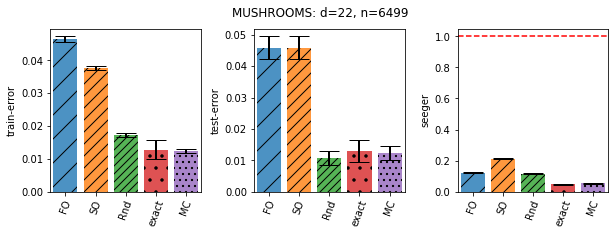

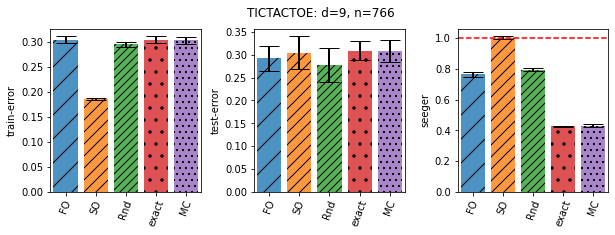

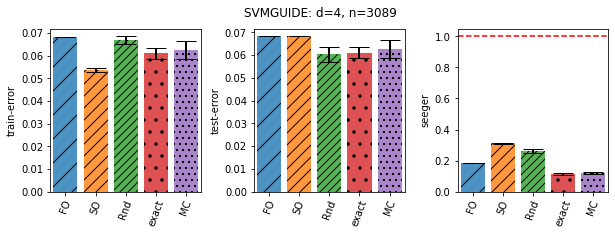

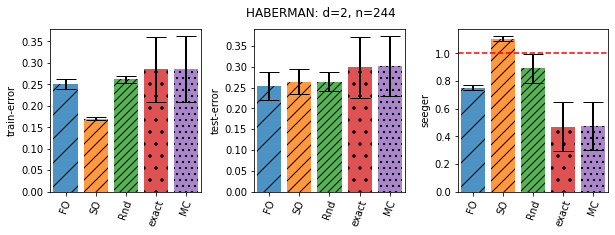

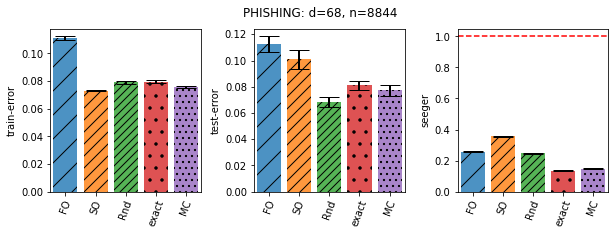

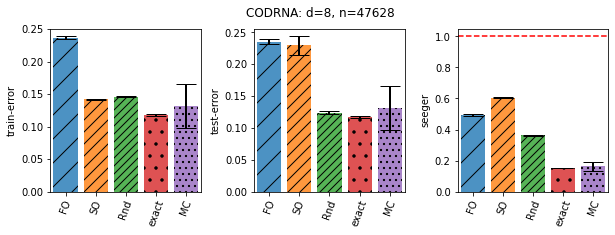

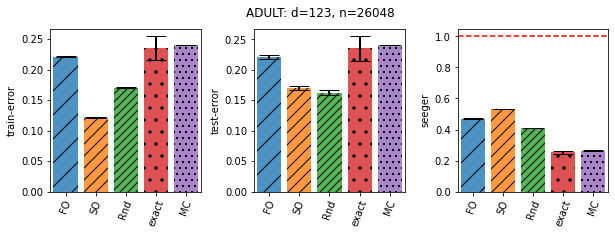

In [22]:
hatches = ["/", "//", "///", ".", "..", "..."]
step = len(methods)
for d, s, n in zip(datasets, dims, ns):
    
    plt.figure(figsize=(10,3))
    for j, y in enumerate(["train-error", "test-error", bound]):
        ax = plt.subplot(131 + j)
    
        for i, (m, h) in enumerate(zip(methods, hatches)):

            plt.bar(i, results[d][m][y][0], yerr=results[d][m][y][1], label=m, alpha=0.8, hatch=h, error_kw=dict(lw=2, capsize=10, capthick=1))
            plt.ylabel(y)

        if y == bound:
            plt.plot([-0.5, step-0.5], [1, 1], linestyle='dashed', c="r")

        ax.set_xticks(range(step))
        ax.set_xticklabels(methods, rotation=70)
        plt.xlim(-0.5, step-0.5)
        plt.subplots_adjust(wspace=0.35)
        
    plt.suptitle(f"{d}: d={s}, n={n}")
    plt.savefig(f"{d}.pdf", bbox_inches="tight")

In [4]:
def draw_bars(datasets):
    
    x_pos = np.linspace(0, 0.75*len(methods), len(methods))
    step = len(methods)
    
    plt.figure(figsize=(9, 6))
    b = "seeger"
    
    for i, d in enumerate(datasets):
        ax = plt.subplot(2, 4, i + 1)
        test_errors = ([results[d][m]["test-error"][0] for m in methods], [results[d][m]["test-error"][1] for m in methods])
        bounds = ([results[d][m][b][0] for m in methods], [results[d][m][b][1] for m in methods])

        plt.bar(x_pos, bounds[0], yerr=bounds[1], alpha=0.8, hatch="//", label="bound", error_kw=dict(lw=2, ecolor="m"))
        plt.bar(x_pos, test_errors[0], yerr=test_errors[1], alpha=1, hatch="..", label="test error", error_kw=dict(lw=2, ecolor="m"))

        plt.title(d, fontsize=15)
        plt.ylim(0, 1)
        ax.set_xticklabels(methods, fontsize=12, rotation=70)    
        ax.set_xticks(x_pos)
        
        if i % 4 != 0:
            ax.set_yticks([])
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.subplots_adjust(wspace=0, hspace=0.7)

    plt.savefig(f"binary-test.pdf", bbox_inches="tight")

/home/vale/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator


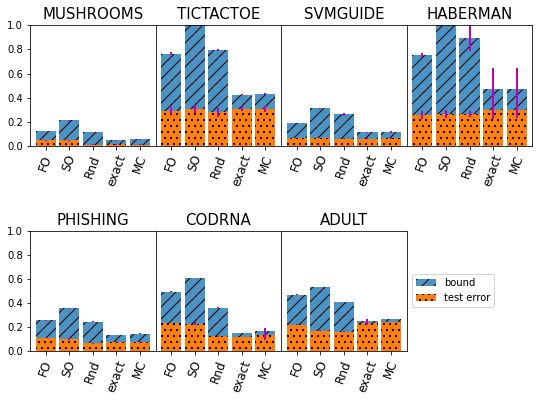

In [34]:
draw_bars(datasets)

In [5]:
for m in ["BayesianNB", "FO", "SO", "Rnd", "exact", "MC"]:
    line = f"& {m}"
    for d in ["HABERMAN", "TICTACTOE", "SVMGUIDE", "MUSHROOMS", "PHISHING", "CODRNA", "ADULT"]:
        e, es = results[d][m]["test-error"]
        line += f" & ${e*100:.2f} \pm {es*100:.2f}$ "
    print(line + r"\\")

& BayesianNB & $25.65 \pm 2.10$  & $30.21 \pm 3.06$  & $34.51 \pm 0.00$  & $11.65 \pm 0.59$  & $44.49 \pm 0.05$  & $66.67 \pm 0.00$  & $24.07 \pm 0.00$ \\
& FO & $25.48 \pm 3.37$  & $29.22 \pm 2.77$  & $6.83 \pm 0.00$  & $4.60 \pm 0.36$  & $11.26 \pm 0.58$  & $23.52 \pm 0.35$  & $22.14 \pm 0.36$ \\
& SO & $26.45 \pm 2.99$  & $30.52 \pm 3.55$  & $6.83 \pm 0.00$  & $4.60 \pm 0.36$  & $10.10 \pm 0.73$  & $22.93 \pm 1.43$  & $17.02 \pm 0.29$ \\
& Rnd & $26.45 \pm 2.19$  & $27.76 \pm 3.71$  & $6.04 \pm 0.32$  & $1.08 \pm 0.22$  & $6.84 \pm 0.41$  & $12.41 \pm 0.23$  & $16.24 \pm 0.37$ \\
& exact & $29.84 \pm 7.34$  & $30.91 \pm 2.10$  & $6.11 \pm 0.25$  & $1.30 \pm 0.35$  & $8.12 \pm 0.35$  & $11.77 \pm 0.16$  & $23.49 \pm 1.99$ \\
& MC & $30.10 \pm 7.21$  & $30.84 \pm 2.38$  & $6.27 \pm 0.40$  & $1.23 \pm 0.23$  & $7.74 \pm 0.42$  & $13.13 \pm 3.43$  & $24.07 \pm 0.00$ \\


In [7]:
for m in ["FO", "SO", "Rnd", "exact", "MC"]:
    line = f"& {m}"
    for d in ["HABERMAN", "TICTACTOE", "SVMGUIDE", "MUSHROOMS", "PHISHING", "CODRNA", "ADULT"]:
        e, es = results[d][m]["seeger"]
        line += f" & ${e*100:.2f} \pm {es*100:.2f}$ "
    print(line + r"\\")

& FO & $75.24 \pm 1.78$  & $76.48 \pm 1.48$  & $18.62 \pm 0.00$  & $12.31 \pm 0.22$  & $25.75 \pm 0.32$  & $49.45 \pm 0.47$  & $46.93 \pm 0.19$ \\
& SO & $110.60 \pm 1.65$  & $100.25 \pm 0.99$  & $31.06 \pm 0.36$  & $21.27 \pm 0.31$  & $35.67 \pm 0.21$  & $60.59 \pm 0.20$  & $53.33 \pm 0.09$ \\
& Rnd & $89.19 \pm 10.59$  & $79.55 \pm 0.90$  & $26.37 \pm 1.34$  & $11.49 \pm 0.27$  & $24.64 \pm 0.20$  & $36.24 \pm 0.13$  & $41.06 \pm 0.13$ \\
& exact & $46.97 \pm 17.69$  & $42.49 \pm 0.53$  & $11.38 \pm 0.61$  & $4.77 \pm 0.26$  & $13.50 \pm 0.19$  & $15.16 \pm 0.17$  & $25.42 \pm 1.07$ \\
& MC & $47.34 \pm 17.57$  & $43.07 \pm 0.72$  & $11.79 \pm 0.68$  & $5.42 \pm 0.20$  & $14.62 \pm 0.28$  & $16.48 \pm 2.86$  & $26.46 \pm 0.09$ \\


In [2]:
M = 10
lr = 0.1
batch_size = 1024
priors = [0.1       ,   0.21544347,   0.46415888,   1        ,
         2.15443469,   10        ,  21.5443469 ,
        46.41588834, 100]

bound = "seeger"

datasets = ["ADULT", "CODRNA", "HABER", "PHIS", "TTT", "MUSH", "SVMGUIDE"]

results = {d: {} for d in datasets}

method = "exact"
for d in datasets:
    
    results[d][method] = {}
    for p in priors:
        load_dir = Path(f"../results/all/{d}/")
        try:
            if d in ["ADULT", "PHIS", "CODRNA"]:
                path = next(load_dir.rglob(f"exact/**/prior={p}/**/err-b.npy"))
            else:
                path = next(load_dir.rglob(f"MC/**/prior={p}/**/MC=*/err-b.npy"))
            results[d][method][p] = np.load(path, allow_pickle=True).item()        
        except:
            print("Missing", d, p)
    
    load_dir = Path(f"../results/all/{d}/Rnd/{bound}/optimize-bound=True/stochastic-bound=False/stumps-uniform/M={M}/")
    path = next(load_dir.rglob(f"**/prior=1/**/err-b.npy"))
    results[d]["Rnd"] = np.load(path, allow_pickle=True).item() 
    
    load_dir = Path(f"../results/all/{d}/FO/{bound}/optimize-bound=True/stochastic-bound=False/stumps-uniform/M={M}/")
    path = next(load_dir.rglob(f"**/prior=1/**/err-b.npy"))
    results[d]["FO"] = np.load(path, allow_pickle=True).item() 
    
    load_dir = Path(f"../results/all/{d}/SO/{bound}/optimize-bound=True/stochastic-bound=False/stumps-uniform/M={M}/")
    path = next(load_dir.rglob(f"**/prior=1/**/err-b.npy"))
    results[d]["SO"] = np.load(path, allow_pickle=True).item() 

results["TICTACTOE"] = results["TTT"]
results["HABERMAN"] = results["HABER"]
results["MUSHROOMS"] = results["MUSH"]
results["PHISHING"] = results["PHIS"]

datasets = ["MUSHROOMS", "TICTACTOE", "SVMGUIDE", "HABERMAN", "PHISHING", "CODRNA", "ADULT"]

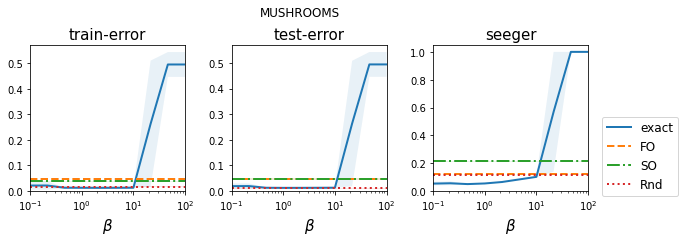

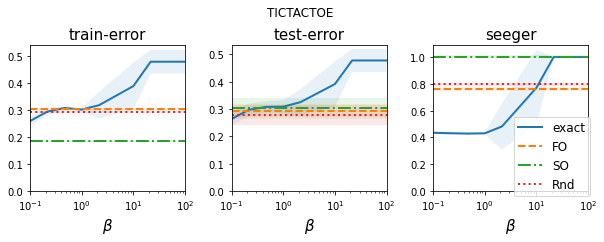

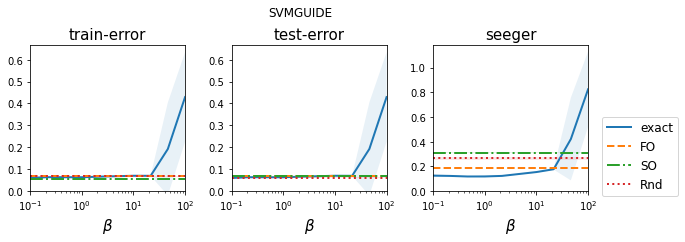

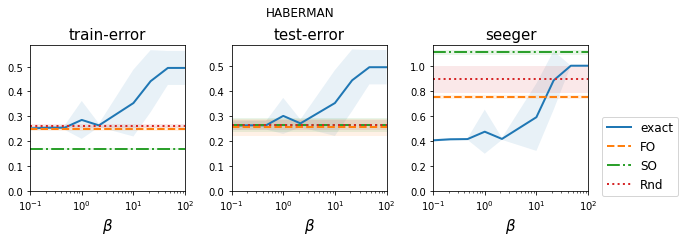

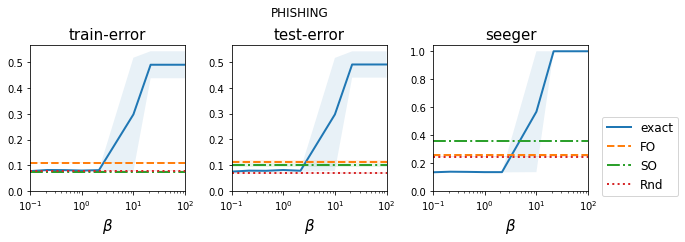

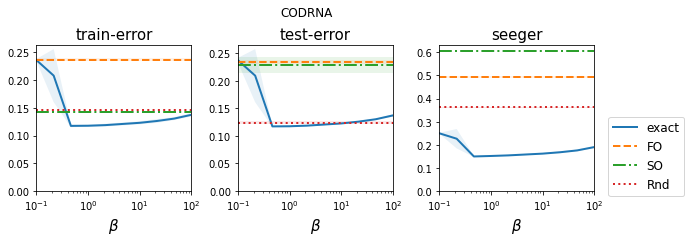

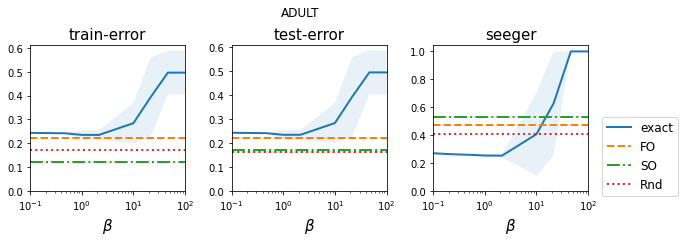

In [6]:

methods = ["FO", "SO", "Rnd"]
styles = ["--", "-.", ":"]

for d in datasets:
    plt.figure(figsize=(10,3))

    x_min, x_max = min(priors), max(priors)
    for j, e in enumerate(["train-error", "test-error", bound]):
        ax = plt.subplot(131 + j)

        y = np.array([results[d]["exact"][p][e][0] for p in priors])
        err = np.array([results[d]["exact"][p][e][1] for p in priors])

        plt.plot(priors, y, label="exact", linestyle="-", linewidth=2)
        plt.fill_between(priors, y-err, y+err, alpha=0.1)

        for m, s in zip(methods, styles):
            y = np.array([results[d][m][e][0] for p in priors])
            err = np.array([results[d][m][e][1] for p in priors])

            plt.plot(priors, y, label=m, linestyle=s, linewidth=2)
            plt.fill_between(priors, y-err, y+err, alpha=0.1)

        plt.xlim(x_min, x_max)
        plt.ylim(0)
        plt.xlabel(r"$\beta$", fontsize=15)
        plt.title(e, fontsize=15)
        plt.xscale("log")

    plt.legend(bbox_to_anchor=(1.05, 0.55), fontsize=12)   
    plt.subplots_adjust(wspace=0.3, top=0.8)
    
    plt.suptitle(d, fontsize=12)
    plt.savefig(f"{d}-prior.pdf", bbox_inches="tight")

In [23]:
bound = "seeger"
M = 100
depths = list(range(1, 11))

methods = ["FO", "SO", "Rnd", "exact", "MC"]

results = {}
for d in ["TTT"]:
    
    results[d] = {}
    for m in methods:
#         load_dir = Path(f"../results/multic/{d}/{m}/{bound}")
        load_dir = Path(f"../results/all/{d}/{m}/{bound}")
        
        results[d][m] = {}
        for t in depths:
            
            try:
                path = next(load_dir.rglob(f"**/stochastic-bound=False/**/M={M}/**/max-depth={t}/**/err-b.npy"))
                results[d][m][t] = np.load(path, allow_pickle=True).item()
            except:
                print("Missing", load_dir, t)

results["TICTACTOE"] = results["TTT"]

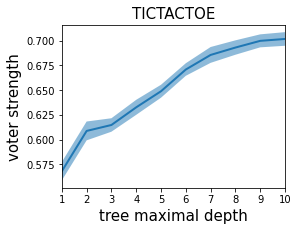

In [24]:
plt.figure(figsize=(4,3))
d = "TICTACTOE"
e = "strength"

strengths = [results[d]["exact"][t][e][0] for t in depths]
    
plt.plot(depths, strengths, linewidth=2)
plt.fill_between(depths, [results[d]["SO"][t][e][0] - results[d]["SO"][t][e][1] for t in depths], [results[d]["SO"][t][e][0] + results[d]["SO"][t][e][1] for t in depths], alpha=0.5)

plt.title(d, fontsize=15)
plt.xlim(1, 10)
plt.xticks(range(1, 11))
plt.xlabel("tree maximal depth", fontsize=15)
plt.ylabel("voter strength", fontsize=15)
    
plt.savefig(f"{d}-strength.pdf", bbox_inches="tight")

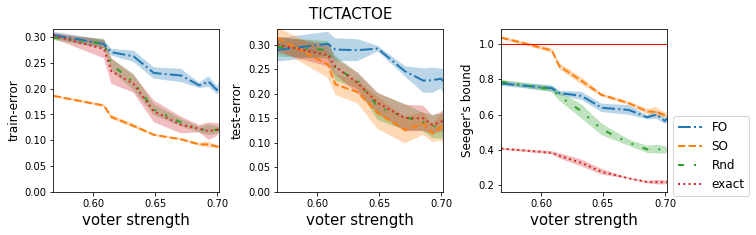

In [25]:
methods = ["FO", "SO", "Rnd", "exact"]
styles = ["-.", "--", (0, (3, 5, 1, 5, 1, 5)), ":", "-"]
plt.figure(figsize=(11,3))

x_min, x_max = min(strengths), max(strengths)
for j, e in enumerate(["train-error", "test-error", bound]):
    ax = plt.subplot(131 + j)

    for m, s in zip(methods, styles):
        y = np.array([results[d][m][t][e][0] for t in depths])
        err = np.array([results[d][m][t][e][1] for t in depths])

        plt.plot(strengths, y, label=m, linestyle=s, linewidth=2)
        plt.fill_between(strengths, y-err, y+err, alpha=0.3)
        
        if e == bound:
            plt.plot([x_min, x_max], [1, 1], c="r", linewidth=1)
            plt.ylabel("Seeger's bound", fontsize=12)
        else:
            plt.ylim(0)
            plt.ylabel(e, fontsize=12)
            
        plt.xlim(x_min, x_max)
        plt.xlabel("voter strength", fontsize=15)

plt.suptitle(d, fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=12)   
plt.subplots_adjust(wspace=0.35)
    
plt.savefig(f"{d}-strength-stats.pdf", bbox_inches="tight")

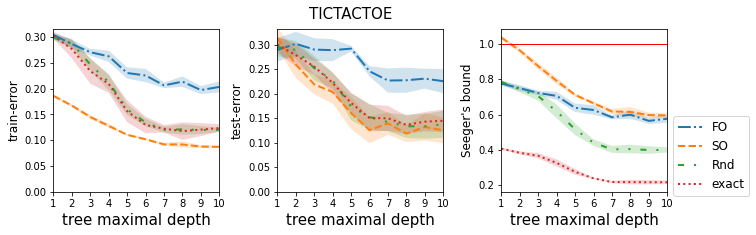

In [32]:
plt.figure(figsize=(11,3))

x_min, x_max = min(depths), max(depths)
for j, e in enumerate(["train-error", "test-error", bound]):
    ax = plt.subplot(131 + j)

    for m, s in zip(methods, styles):
        y = np.array([results[d][m][t][e][0] if isinstance(results[d][m][t][e], tuple) else results[d][m][t][e] for t in depths])
        err = np.array([results[d][m][t][e][1] if isinstance(results[d][m][t][e], tuple) else 0. for t in depths])

        plt.plot(depths, y, label=m, linestyle=s, linewidth=2)
        plt.fill_between(depths, y-err, y+err, alpha=0.2)
        
        if e == bound:
            plt.plot([x_min, x_max], [1, 1], c="r", linewidth=1)
            plt.ylabel("Seeger's bound", fontsize=12)
        else:
            plt.ylim(0)
            plt.ylabel(e, fontsize=12)
            
        plt.xlim(x_min, x_max)
        plt.xticks(range(1, 11))
        plt.xlabel("tree maximal depth", fontsize=15)

plt.suptitle(d, fontsize=15)
plt.legend(bbox_to_anchor=(1, 0.5), fontsize=12)   
plt.subplots_adjust(wspace=0.35)
    
plt.savefig(f"{d}-depth-stats.pdf", bbox_inches="tight")

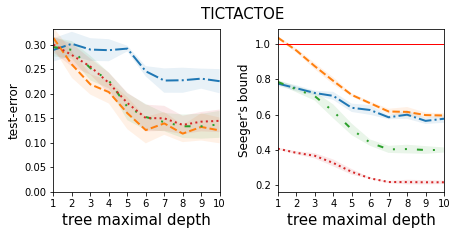

In [33]:
plt.figure(figsize=(7,3))

x_min, x_max = min(depths), max(depths)
for j, e in enumerate(["test-error", bound]):
    ax = plt.subplot(121 + j)

    for m, s in zip(methods, styles):
        y = np.array([results[d][m][t][e][0] if isinstance(results[d][m][t][e], tuple) else results[d][m][t][e] for t in depths])
        err = np.array([results[d][m][t][e][1] if isinstance(results[d][m][t][e], tuple) else 0. for t in depths])

        plt.plot(depths, y, label=m, linestyle=s, linewidth=2)
        plt.fill_between(depths, y-err, y+err, alpha=0.1)
        
        if e == bound:
            plt.plot([x_min, x_max], [1, 1], c="r", linewidth=1)
            plt.ylabel("Seeger's bound", fontsize=12)
        else:
            plt.ylim(0)
            plt.ylabel(e, fontsize=12)
            
        plt.xlim(x_min, x_max)
        plt.xticks(range(1, 11))
        plt.xlabel("tree maximal depth", fontsize=15)

plt.suptitle(d, fontsize=15)
# plt.legend(bbox_to_anchor=(1, 0.5), fontsize=12)   
plt.subplots_adjust(wspace=0.35)
    
plt.savefig(f"{d}-depth2.pdf", bbox_inches="tight")